## Question 1
EDA – Telecom Customer Usage (Easy)

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Step 2: Load Dataset
df = pd.read_csv(r"D:\DATA\DESK\AI exam questions\dataset1.csv")  # Update path 

In [ ]:
#  Step 3: Inspect Dataset
print("Shape:", df.shape)

Shape: (7043, 21)


In [4]:
print("\nData Types:\n", df.dtypes)


Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Step 4: Handle 'TotalCharges' (Convert to numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\419376\AppData\Local\Temp\ipykernel_16292\1776084661.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [9]:
#  Step 5: Create Tenure Groups
def tenure_group(tenure):
    if tenure <= 12:
        return "Low"
    elif 12 < tenure <= 48:
        return "Medium"
    else:
        return "High"

df["tenure_group"] = df["tenure"].apply(tenure_group)

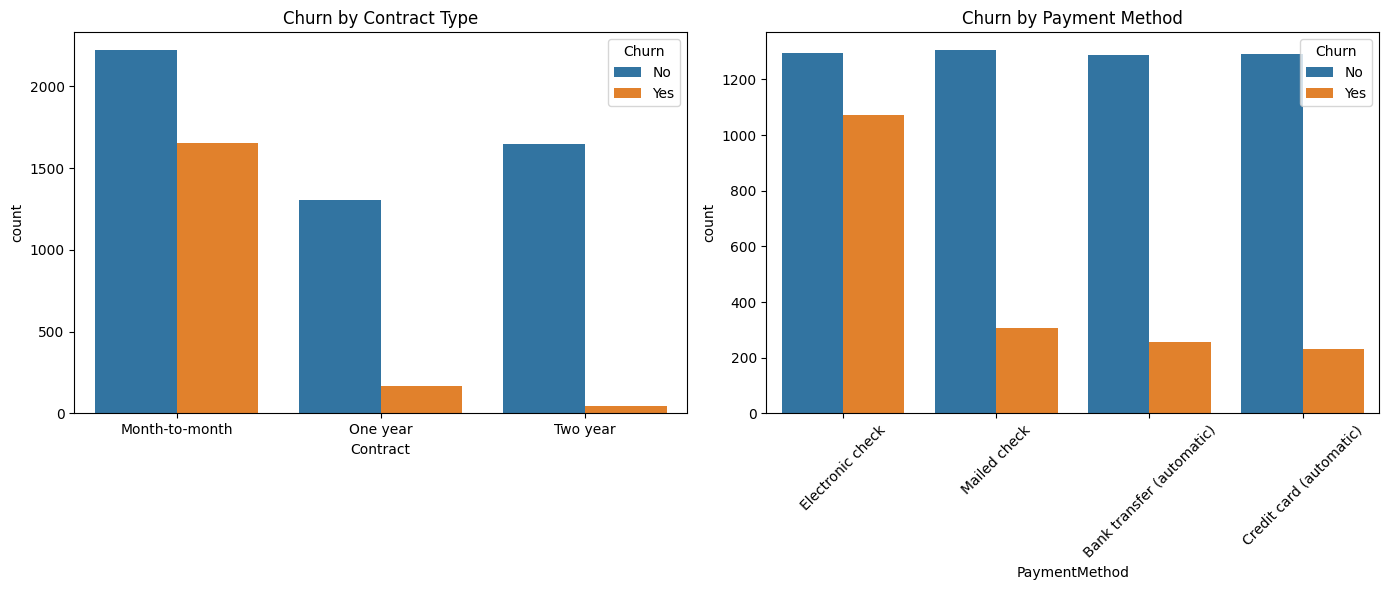


Sample Processed Data:
    tenure tenure_group  MonthlyCharges  TotalCharges Churn
0       1          Low        0.115423      0.001275    No
1      34       Medium        0.385075      0.215867    No
2       2          Low        0.354229      0.010310   Yes
3      45       Medium        0.239303      0.210241    No
4       2          Low        0.521891      0.015330   Yes


In [ ]:
# Step 6: Visualize Churn Trends
plt.figure(figsize=(14, 6))

# Plot 1 - Churn by Contract Type
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")

# Plot 2 - Churn by Payment Method
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="PaymentMethod", hue="Churn")
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")

plt.tight_layout()
plt.show()

In [11]:
# Step 7: Normalize Numerical Columns
scaler = MinMaxScaler()
df[["MonthlyCharges", "TotalCharges"]] = scaler.fit_transform(df[["MonthlyCharges", "TotalCharges"]])

# Step 8: Final View of Key Columns
print("\nSample Processed Data:\n", df[["tenure", "tenure_group", "MonthlyCharges", "TotalCharges", "Churn"]].head())


Sample Processed Data:
    tenure tenure_group  MonthlyCharges  TotalCharges Churn
0       1          Low        0.115423      0.001275    No
1      34       Medium        0.385075      0.215867    No
2       2          Low        0.354229      0.010310   Yes
3      45       Medium        0.239303      0.210241    No
4       2          Low        0.521891      0.015330   Yes


## Question 2 
Classification – Predict Customer Churn (Medium)

In [12]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataframe
df_model = df.copy()

# Apply LabelEncoder to all object columns
le = LabelEncoder()
for column in df_model.select_dtypes(include='object').columns:
    df_model[column] = le.fit_transform(df_model[column])

In [13]:
# Check encoded data
df_model.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,0.115423,0.001275,0,1
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,0.385075,0.215867,0,2
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,0.354229,0.010310,1,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,0.239303,0.210241,0,2
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,0.521891,0.015330,1,1


In [14]:
from sklearn.model_selection import train_test_split

# Drop customerID as it's not useful for prediction
X = df_model.drop(columns=["Churn", "customerID"])
y = df_model["Churn"]

In [15]:
# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [18]:
# Train each model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [19]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [20]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Evaluation:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))


📊 Logistic Regression Evaluation:
Accuracy : 0.7977288857345636
Precision: 0.6478405315614618
Recall   : 0.5213903743315508
F1 Score : 0.5777777777777777

📊 Decision Tree Evaluation:
Accuracy : 0.7253371185237757
Precision: 0.4830287206266319
Recall   : 0.4946524064171123
F1 Score : 0.48877146631439894

📊 Random Forest Evaluation:
Accuracy : 0.7885024840312278
Precision: 0.6301369863013698
Recall   : 0.4919786096256685
F1 Score : 0.5525525525525525


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize grid search
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

# Best model
best_logreg = grid.best_estimator_

# Print best params
print("✅ Best Hyperparameters for Logistic Regression:")
print(grid.best_params_)


✅ Best Hyperparameters for Logistic Regression:
{'C': 1, 'solver': 'lbfgs'}


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test set
y_pred_best = best_logreg.predict(X_test)

# Evaluate
print("📊 Performance of Tuned Logistic Regression Model:")
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1 Score :", f1_score(y_test, y_pred_best))


📊 Performance of Tuned Logistic Regression Model:
Accuracy : 0.7977288857345636
Precision: 0.6478405315614618
Recall   : 0.5213903743315508
F1 Score : 0.5777777777777777


In [23]:
import pandas as pd
import numpy as np

# Get feature names and their coefficients
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_logreg.coef_[0]
})

# Sort by absolute value to see most impactful features
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Show top 10
print(" Top 10 Important Features:")
print(importance_df[['Feature', 'Coefficient']].head(10))


 Top 10 Important Features:
             Feature  Coefficient
17    MonthlyCharges     2.598097
5       PhoneService    -0.895910
14          Contract    -0.783989
18      TotalCharges     0.661793
15  PaperlessBilling     0.404358
19      tenure_group    -0.293735
8     OnlineSecurity    -0.282465
11       TechSupport    -0.252148
7    InternetService     0.228518
3         Dependents    -0.223664


C:\Users\419376\AppData\Local\Temp\ipykernel_16292\369953667.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Abs_Coefficient', y='Feature', palette='viridis')
C:\Users\419376\AppData\Local\Temp\ipykernel_16292\369953667.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\419376\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


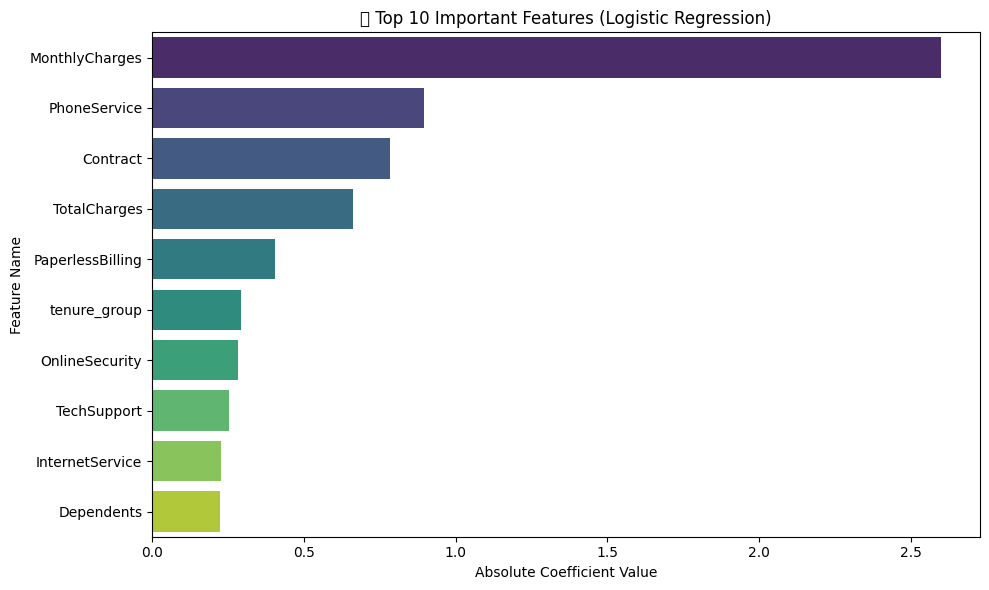

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names and coefficients
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_logreg.coef_[0]
})

# Sort by absolute value
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 features
top_features = importance_df.head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Abs_Coefficient', y='Feature', palette='viridis')
plt.title('🔍 Top 10 Important Features (Logistic Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()
